# MDEO model: neutrino masses inversion + DM scan

The idea is to do a firts DM random scan

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
import pyslha
import pyMDEO_LesHouches_generator

import neutrino_analytic
import NEUTRINO2018

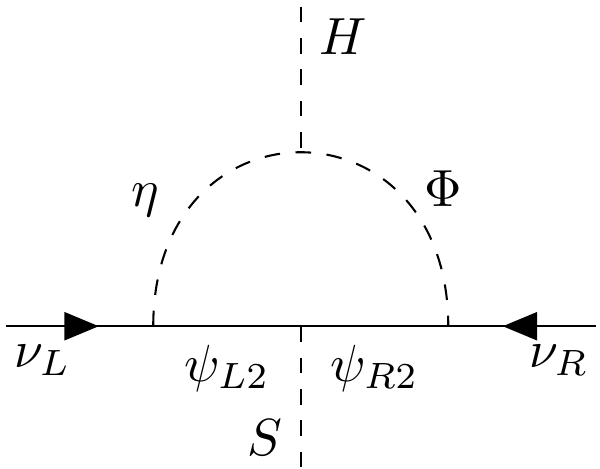

In [3]:
from IPython.display import Image
Image("/home/anferivera/Work/Documents_compartidos/MDEO/neutrino-diagram.png", width=300)

Run diccionary 

In [27]:
# Tiempo inicial
t1=time.time() 

x=[]

Num = 10

for i in range(0,Num):
    
    #Open the dicctionary
    xdict = pyMDEO_LesHouches_generator.buildSLHAinFile()

    #Random parameters
    g1p = np.exp(np.random.uniform(np.log(10**(-3)),np.log(10**(0)))) #U1 coupling
    MZp = np.exp(np.random.uniform(np.log(9.6e1),np.log(5.0e2)))
    vX = MZp/(9.0*g1p)
    VEV = 246.220569
    theta = np.exp(np.random.uniform(np.log(1.0e-6),np.log(1.0e-3)))
    gamma = 1.0/np.sqrt(1.0+np.tan(2.0*theta)**2.0)
    
    mh1=125.1
    mh2= np.exp(np.random.uniform(np.log(1.0e3),np.log(5.0e3)))
    Lam1=(0.5/VEV**2.0)*(mh1**2.0+mh2**2.0-gamma*(mh2**2.0-mh1**2.0))
    
    Lam2 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0)))) #conj[Et].Et.conj[Et].Et
    Lam3 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0)))) #conj[H].H.conj[Et].Et
    Lam4 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0)))) #conj[H].Et.conj[Et].H
    Lam5 = (0.5/vX**2.0)*(mh1**2.0+mh2**2.0+gamma*(mh2**2.0-mh1**2.0)) ##conj[bi].bi.conj[bi].bi
    Lam6 = (0.5/(VEV*vX))*gamma*(mh2**2.0-mh1**2.0)*np.tan(2.0*theta) ##conj[bi].bi.conj[H].H
    Lam7 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0)))) #conj[bi].bi.conj[Et].Et
    Lam8 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0)))) ##conj[S].S.conj[S].S
    Lam9 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0)))) #conj[S].S.conj[H].H
    Lam10 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0)))) #conj[S].S.conj[bi].bi
    Lam11 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0)))) ##conj[S].S.conj[Et].Et
    MS2 = np.exp(np.random.uniform(np.log(10**(6)),np.log(10**(8)))) #conj[S].S
    Mn2 = np.exp(np.random.uniform(np.log(10**(6)),np.log(10**(8)))) #mEt2 conj[Et].Et
    Yc = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0)))) # Yc bi.CL.CR
    muC = np.exp(np.random.uniform(np.log(10**(2)),np.log(2.*10**(3)))) #muC conj[H].Et.conj[S]

    xdict.blocks['MINPAR'].entries[1]='%.6E    # lambda1Input'%Lam1
    xdict.blocks['MINPAR'].entries[2]='%.6E    # lambda2Input'%Lam2
    xdict.blocks['MINPAR'].entries[3]='%.6E    # lambda3Input'%Lam3
    xdict.blocks['MINPAR'].entries[4]='%.6E    # lambda4Input'%Lam4
    xdict.blocks['MINPAR'].entries[5]='%.6E    # lambda5Input'%Lam5
    xdict.blocks['MINPAR'].entries[6]='%.6E    # lambda6Input'%Lam6
    xdict.blocks['MINPAR'].entries[7]='%.6E    # lambda7Input'%Lam7
    xdict.blocks['MINPAR'].entries[8]='%.6E    # lambda8Input'%Lam8
    xdict.blocks['MINPAR'].entries[9]='%.6E    # lambda9Input'%Lam9
    xdict.blocks['MINPAR'].entries[10]='%.6E    # lambda10Input'%Lam10
    xdict.blocks['MINPAR'].entries[11]='%.6E    # lambda11Input'%Lam11
    xdict.blocks['MINPAR'].entries[20]='%.6E    # g1pINPUT'%g1p
    xdict.blocks['MINPAR'].entries[23]='%.6E    # mEt2Input'%Mn2
    xdict.blocks['MINPAR'].entries[24]='%.6E    # MS2Input'%MS2
    xdict.blocks['MINPAR'].entries[30]='%.6E    # vXinput'%vX
    xdict.blocks['MINPAR'].entries[31]='%.6E    # Ycinput'%Yc
    xdict.blocks['MINPAR'].entries[32]='%.6E    # muCinput'%muC
    
    mc = Yc*vX/np.sqrt(2.)
    
    '''if mc < MZp:
        continue'''
    
    MX1 = mc+np.exp(np.random.uniform(np.log(1.0),np.log(1.0e3)))
    MX2 = MX1+np.exp(np.random.uniform(np.log(1.0),np.log(1.0e3)))
    thetaf = np.exp(np.random.uniform(np.log(1.0e-3),np.log(2.0*np.pi)))
    gammaf = 1.0/np.sqrt(1.0+np.tan(2.0*thetaf)**2.0)
    YX11 = np.sqrt(2.0)/vX*0.5*(MX1+MX2-gammaf*(MX2-MX1)) #Yx bi.FxL.FxR
    YX22 = np.sqrt(2.0)/vX*0.5*(MX1+MX2+gammaf*(MX2-MX1))
    YX12 = np.sqrt(2.0)/vX*0.5*gammaf*(MX2-MX1)*np.tan(2.0*thetaf)
    YX21 = YX12
    
    xdict.blocks['YXIN'].entries[1,1]='%.6E    # YX(1,1)'%YX11
    xdict.blocks['YXIN'].entries[1,2]='%.6E    # YX(1,2)'%YX12
    xdict.blocks['YXIN'].entries[2,1]='%.6E    # YX(2,1)'%YX21
    xdict.blocks['YXIN'].entries[2,2]='%.6E    # YX(2,2)'%YX22

    #Rotation matrices and Yukawas after inversion
    FMa = neutrino_analytic.MATFermionXi(YX11,YX12,YX21,YX22,vX)
    SMa = neutrino_analytic.MATSalarS0(Lam3,Lam4,Lam7,Lam9,Lam10,vX,VEV,muC,MS2,Mn2)
    YUKS = neutrino_analytic.Yukawas(NEUTRINO2018.nuexpvalues(),FMa,SMa)

    YnL11 = YUKS['YnL11']
    YnL12 = YUKS['YnL12']
    YnL13 = YUKS['YnL13']
    YnL21 = YUKS['YnL21']
    YnL22 = YUKS['YnL22']
    YnL23 = YUKS['YnL23']
    YnR11 = YUKS['YnR11']
    YnR12 = YUKS['YnR12']
    YnR13 = YUKS['YnR13']
    YnR21 = YUKS['YnR21']
    YnR22 = YUKS['YnR22']
    YnR23 = YUKS['YnR23']

    ZL11 = YUKS['ZL11']
    ZL12 = YUKS['ZL12']
    ZL21 = YUKS['ZL21']
    ZL22 = YUKS['ZL22']
    ZR11 = YUKS['ZR11']
    ZR12 = YUKS['ZR12']
    ZR21 = YUKS['ZR21']
    ZR22 = YUKS['ZR22']
    mXi_1 = YUKS['mXi_1']
    mXi_2 = YUKS['mXi_2']

    ZN11 = YUKS['ZN11']
    ZN12 = YUKS['ZN12']
    ZN21 = YUKS['ZN21']
    ZN22 = YUKS['ZN22']
    mns_1 = YUKS['mns_1']
    mns_2 = YUKS['mns_2']

    ##hdij->YnLij
    xdict.blocks['YNLIN'].entries[1,1]='%.6E    # YnL(1,1)'%YnL11
    xdict.blocks['YNLIN'].entries[1,2]='%.6E    # YnL(1,2)'%YnL12
    xdict.blocks['YNLIN'].entries[1,3]='%.6E    # YnL(1,3)'%YnL13
    xdict.blocks['YNLIN'].entries[2,1]='%.6E    # YnL(2,1)'%YnL21
    xdict.blocks['YNLIN'].entries[2,2]='%.6E    # YnL(2,2)'%YnL22
    xdict.blocks['YNLIN'].entries[2,3]='%.6E    # YnL(2,3)'%YnL23
    ##heij->YnRij
    xdict.blocks['YNRIN'].entries[1,1]='%.6E    # YnR(1,1)'%YnR11
    xdict.blocks['YNRIN'].entries[1,2]='%.6E    # YnR(1,2)'%YnR12
    xdict.blocks['YNRIN'].entries[1,3]='%.6E    # YnR(1,3)'%YnR13
    xdict.blocks['YNRIN'].entries[2,1]='%.6E    # YnR(2,1)'%YnR21
    xdict.blocks['YNRIN'].entries[2,2]='%.6E    # YnR(2,2)'%YnR22
    xdict.blocks['YNRIN'].entries[2,3]='%.6E    # YnR(2,3)'%YnR23

    #Write the Leshouches file
    pyslha.writeSLHAFile('LesHouches.in.MDEO_low',xdict)
    
    #print('before SPHENO')
    #run SPheno
    spheno = subprocess.getoutput('../.././SPheno-4.0.5/bin/SPhenoMDEO LesHouches.in.MDEO_low')
    so = subprocess.getoutput('cat SPheno.spc.MDEO')
    
    T = eval(so.split('Block SPhenoLowEnergy #')[1].split()[4])
    S = eval(so.split('Block SPhenoLowEnergy #')[1].split()[10])
    U = eval(so.split('Block SPhenoLowEnergy #')[1].split()[16])
    g2mu = eval(so.split('Block SPhenoLowEnergy #')[1].split()[26])
    
    #print('before micromegas')    
    #run micromegas.
    mo = subprocess.getoutput('~/Work/micromegas_5.0.6/MDEO/./CalcOmega_with_DI_Detection')#with_direct_detection
    
    if len(mo.split()) == 2:
        continue
    
    Omega1 = eval(mo.split('Omega_1h^2=')[1].split()[0])
    Omega2 = eval(mo.split('Omega_2h^2=')[1].split()[0])
    #print("i=",i,"Omega1=",Omega1,"Omega2=",Omega2)
    
    if Omega1+Omega2 > 0.1236:
        continue
    
    SIN1= eval(mo.split('CDM1-nucleon cross sections[pb]:')[1].split()[7])
    SIN2= eval(mo.split('CDM2-nucleon cross sections[pb]:')[1].split()[7])
    sv = eval(mo.split('CDM2-nucleon cross sections[pb]:')[1].split()[7])
    
    x.append([Lam1,Lam2,Lam3,Lam4,Lam5,Lam6,Lam7,Lam8,Lam9,Lam10,Lam11,MS2,Mn2,vX,Yc,VEV,muC,g1p,\
              ZL11,ZL12,ZL21,ZL22,ZR11,ZR12,ZR21,ZR22,\
          ZN11,ZN12,ZN21,ZN22,mXi_1,mXi_2,mns_1,mns_2,YnL11,YnL12,YnL13,YnL21,YnL22,YnL23,\
          YnR11,YnR12,YnR13,YnR21,YnR22,YnR23,Omega1,Omega2,SIN1,SIN2,sv,MZp,mh1,mh2,theta,thetaf,T,S,U,g2mu])

x=np.asarray(x)

xd=pd.DataFrame(x,columns=['Lam1','Lam2','Lam3','Lam4','Lam5','Lam6','Lam7','Lam8','Lam9','Lam10',\
                           'Lam11','MS2','Mn2','vX','Yc','VEV','muC','g1p',\
                           'ZL11','ZL12','ZL21','ZL22','ZR11','ZR12','ZR21','ZR22','ZN11','ZN12','ZN21',\
                           'ZN22','mXi_1','mXi_2','mns_1','mns_2','YnL11','YnL12','YnL13','YnL21','YnL22',\
                           'YnL23','YnR11','YnR12','YnR13','YnR21','YnR22','YnR23','Omega1','Omega2',\
                           'SIN1','SIN2','sv','MZp','mh1','mh2','theta','thetaf','T','S','U','g2mu'])

t2=time.time() 
print ("The program spent", t2-t1, "s running",Num,"times")   

The program spent 38.611985206604004 s running 10 times


In [28]:
xd[['MZp','mh1','mh2','theta','thetaf','mXi_1','mXi_2','T','S','U','g2mu','Omega1','Omega2']]

,MZp,mh1,mh2,theta,thetaf,mXi_1,mXi_2,T,S,U,g2mu,Omega1,Omega2
0,99.060466,125.1,3681.958625,0.000002,0.001285,64.129318,69.921852,-5.630604e-12,1.190702e-08,9.275460e-07,-1.457721e-13,7.410000e-04,1.920000e-07
1,143.018236,125.1,1531.017821,0.000006,0.007272,3775.888762,3818.154967,-4.534467e-08,-3.980109e-07,4.891438e-07,2.158839e-14,2.210000e-10,8.040000e-18
2,317.844872,125.1,1008.356739,0.000006,0.320494,364.660354,716.068501,-3.312213e-09,-6.615667e-08,3.501112e-07,-5.000679e-15,4.550000e-02,4.640000e-02


Concat the new data to the DataFrame and save the file

In [23]:
#xd.to_csv('general-scan.csv')

In [29]:
#Read old file
xd0 = pd.read_csv('general-scan.csv')
del xd0['Unnamed: 0']

In [30]:
print(xd0.shape, xd.shape)

(2, 60) (3, 60)


Run only one time. WARNING!

In [31]:
#Concat and save new general scan
xd = pd.concat([xd0,xd],ignore_index=True )
xd = xd.reset_index()
del[xd['index']]

xd.to_csv('general-scan.csv')

In [32]:
#For good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

Read full file

In [37]:
#Read old file
xd = pd.read_csv('general-scan.csv')

## Dark matter $\Omega h^2$

In [38]:
#Experimental values for DM:Planck results 2018
e = 10
Omega = 0.1200
Omega_min=Omega - e*0.0012
Omega_max=Omega + e*0.0012
print( Omega_min, Omega,Omega_max)

0.108 0.12 0.132


In [39]:
#xd = xd[np.logical_and(xd.Omega > Omega_min, xd.Omega < Omega_max)]

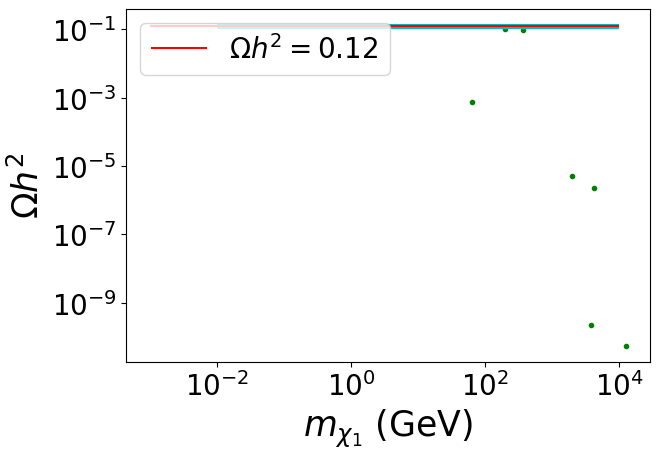

In [41]:
plt.figure(figsize=(7,5))

#plt.loglog(xd.vX*xd.Yc/np.sqrt(2.),xd.Omega1,'b.')
#plt.loglog(xd.mXi_1,xd.Omega2,'g.')
plt.loglog(xd.mXi_1,(xd.Omega1+xd.Omega2),'g.')

plt.hlines(Omega_max,1e-2,1e4, 'c',label=r'')
plt.hlines(Omega_min,1e-2,1e4, 'c',label=r'')

plt.hlines(Omega,1e-3,1e4, 'r',label=r'$\Omega h^2=$0.12')

plt.xlabel(r'$m_{\chi_1}$ (GeV)',size=25)
plt.ylabel(r'$\Omega h^2$',size=25)
plt.legend()

#plt.ylim(Omega_min,Omega_max)
#plt.ylim(0.10,0.15)

plt.tight_layout()

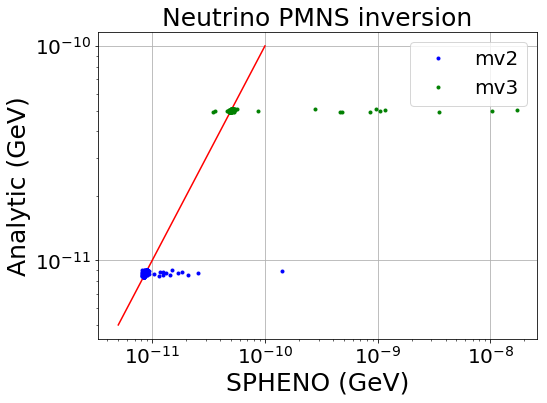

In [14]:
plt.figure(figsize=(8,6))

a = np.linspace(5e-12,1e-10,5)
plt.plot(a,a,'r-')

#plt.loglog(xd.mv1,xd.mn1,'bo')
plt.loglog(xd.mnu2,xd.mv2,'b.')
plt.loglog(xd.mnu3,xd.mv3,'g.')

plt.title(r'Neutrino PMNS inversion',size=25)
plt.xlabel(r'SPHENO (GeV)',size=25)
plt.ylabel(r'Analytic (GeV)',size=25)
plt.legend()

plt.grid()

plt.tight_layout()
#plt.savefig('plots/neutrino_masses_v2.pdf')

In [15]:
print("theory:",mv1,mv2,mv3)

theory: 1e-20 8.56228530731e-12 5.06349917689e-11


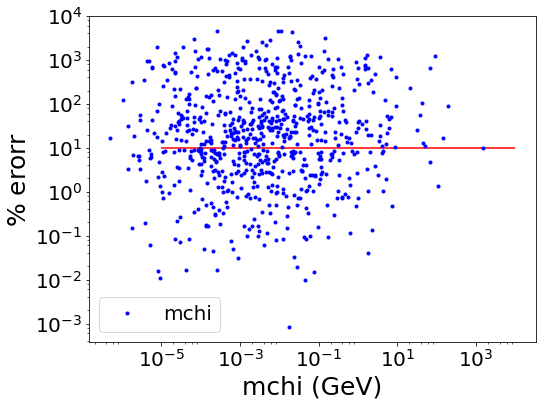

In [21]:
plt.figure(figsize=(8,6))


plt.hlines(10, 1e-5,1e4,'r')

plt.loglog(np.abs(xd.mnu2-xd.mv2)*100/xd.mv2,xd.mchi,'b.')

plt.xlabel(r'mchi (GeV)',size=25)
plt.ylabel(r'$\%$ erorr',size=25)
plt.legend()

plt.show()

Improbing the reconstruction of the neutrino masses

In [22]:
yd = xd[np.logical_and(np.abs(xd.mnu2-xd.mv2)*100/xd.mv2<10., np.abs(xd.mnu3-xd.mv3)*100/xd.mv3<10.)]

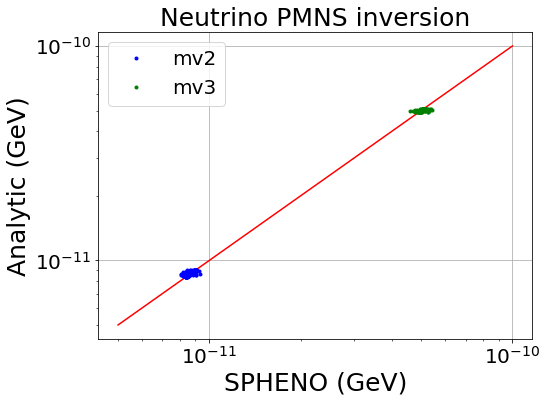

In [24]:
plt.figure(figsize=(8,6))

a = np.linspace(5e-12,1e-10,5)
plt.plot(a,a,'r-')

plt.loglog(yd.mnu2,yd.mv2,'b.')
plt.loglog(yd.mnu3,yd.mv3,'g.')

plt.title(r'Neutrino PMNS inversion',size=25)
plt.xlabel(r'SPHENO (GeV)',size=25)
plt.ylabel(r'Analytic (GeV)',size=25)
plt.legend()

plt.grid()

plt.tight_layout()
#plt.savefig('plots/neutrino_masses_v2.pdf')

# Direct and indirec detection

In [25]:
from indirectdirect import *

In [26]:
from scipy import interpolate

#XENON1T .txt
names1 = ['MDM', 'XENON1TSI']
xe = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_XENON1T/XENON1T-2018.txt')
xdxe = pd.DataFrame(xe, columns=names1)

XENON1T=interpolate.interp1d(xdxe.MDM,xdxe.XENON1TSI)

#PANDAS 1708.06917
names1 = ['MDM', 'pandasSI']
a = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/PandaX/pandaXII.txt')
dd1 = pd.DataFrame(a, columns=names1)

pandaX=interpolate.interp1d(dd1.MDM,dd1.pandasSI)

#LZ prospects 1802.06039
names1 = ['MDM', 'LZ']
a = pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LZ/LZ-SI-prosp-2018.csv',names=names1, header=None)
LZSI = interpolate.interp1d(a.MDM, a.LZ)

#Neutrino-coherent-scattering
names2= ['MDM', 'NCS']
ncs = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/Neutrino-coherent-scattering/Fig26-13108327.txt')
xdncs = pd.DataFrame(ncs, columns=names2)

NCS=interpolate.interp1d(xdncs.MDM,xdncs.NCS)

#DARWIN prospects
names1 = ['MDM', 'DAR']
dd1=pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_Darwin/darwin-SI.csv', names=names1, header=None)

DARSI=interpolate.interp1d(dd1.MDM,dd1.DAR)

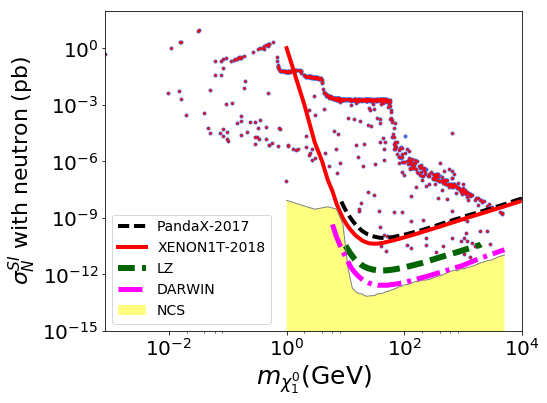

In [27]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.SIN, color='royalblue', marker='o',ms=3,linestyle='', label=r'')
#good points of netrino reconstrucction
plt.loglog(yd.mchi, yd.SIN, color='red', marker='.',ms=3,linestyle='', label=r'')

#plot pandaX data 1708.06917
m=np.arange(8.5,10000)
plt.loglog(m,pandaX(m)*1e+36,color='k',linestyle='dashed',lw=4,label='PandaX-2017')

#XENON1T
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=4,label='XENON1T-2018')

#plt LZ
n=np.arange(10,2000)
plt.semilogy(n,LZSI(n)*1e+36,color='darkgreen',linestyle='--',lw=6,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.0,label='')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='yellow',alpha=0.5,label='NCS')

# DARWIN SI
n=np.arange(6,5000)
plt.loglog(n,DARSI(n)*1e+36,color='magenta',linestyle='-.',lw=5,label='DARWIN')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SI}$ with neutron (pb)',size=22)
plt.legend(prop={'size':14},loc='best')

plt.xlim(yd.mchi.min(),1.0e4)
plt.ylim(1e-15,1e2)

plt.tight_layout()
#plt.savefig('plots/SI.pdf')
plt.show()

$\sigma_{SD}$

In [28]:
from scipy import interpolate

#LZ-1802.06039
names3 = ['MDM', 'LZSD']
lz = pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LZ/LZ-SD-neutron-prosp-2018.csv',names=names3, header=None)
LZSD=interpolate.interp1d(lz.MDM,lz.LZSD)

#DARWIN prospects
names1 = ['MDM', 'DAR']
dd1=pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_Darwin/darwin-SD.csv', names=names1, header=None)
DARSD=interpolate.interp1d(dd1.MDM,dd1.DAR)

#XENON SD 2019
names2 = ['MDM', 'XENON1TSD']
xeSD=pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_XENON1T/SD-2019/neutron.csv',names=names2, header=None)
XENON1TSD=interpolate.interp1d(xeSD.MDM,xeSD.XENON1TSD)

#IC WW SD DATA
ICc_sd = ['M', 'sigmaSD']
ICsd = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_IceCube/IceCubeWW.dat')
IC_SD = pd.DataFrame(ICsd, columns=ICc_sd)

# PICO-60 y PICO-2L
pico60columns = ['M','sigmaSD']
pico60datos = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_PICO/fig12-PICO-60.dat')
PICO60_SD = pd.DataFrame(pico60datos, columns=pico60columns)

#LUX  neutrons 1705.03380
names4 = ['M', 'sigmaSD']
luxSD = pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LUX/SD/LUX-SD-neutron-2017.csv',names=names4, header=None)
LUX_SD_n = interpolate.interp1d(luxSD.M, luxSD.sigmaSD)

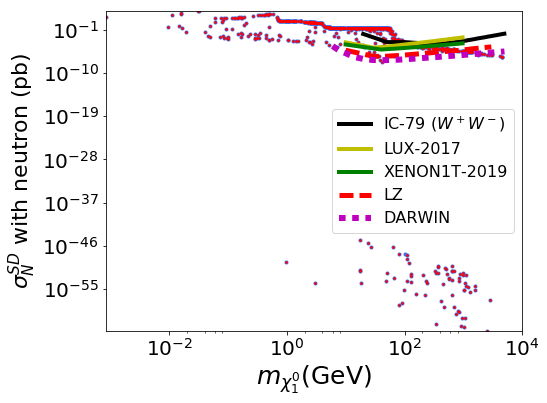

In [29]:
plt.figure(figsize=(8,6))
#For neutrons
plt.loglog(xd.mchi,xd['SDN'], color='royalblue', marker='o',ms=3,linestyle='',label='')
#good neutrino reconstruction masses
plt.loglog(yd.mchi,yd['SDN'], color='red', marker='.',ms=3,linestyle='',label='')

#IceCube limit
plt.plot(10**IC_SD['M'],10**IC_SD['sigmaSD']*1e+36,'k-',lw=4,label=r'IC-79 ($W^+W^-$)')
#LUX-neutron
n=np.arange(10,990,20)
plt.plot(n,LUX_SD_n(n),'y',lw=4,label='LUX-2017')

#XENON1T
nx=np.arange(10,990,30)
plt.loglog(nx,XENON1TSD(nx)*1e+36,'g-',lw=4,label='XENON1T-2019')
#LZ-1802.06039
nn=np.arange(10,3000,20)
plt.loglog(nn,LZSD(nn)*1e+36,'r--',lw=5,label='LZ')

# DARWIN SD
n=np.arange(6,5000)
plt.loglog(n,DARSD(n)*1e+36,'m:',lw=6,label='DARWIN')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SD}$ with neutron (pb)',size=22)
plt.legend(prop={'size':16},loc='best')
plt.xlim(xd.mchi.min(),1.0e4)
plt.ylim(xd.SDN.min(),xd.SDN.max())

plt.tight_layout()
#plt.savefig('plots/SD.pdf')
#plt.show()

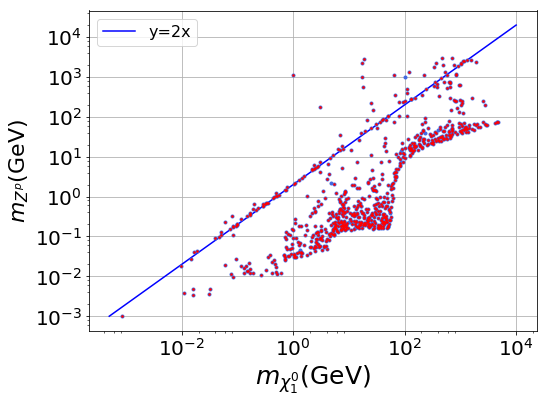

In [30]:
plt.figure(figsize=(8,6))

a = np.linspace(5e-4,1e+4,5)
plt.plot(a,2*a,'b-',label='y=2x')

plt.loglog(xd.mchi,xd.MZp, color='royalblue', marker='o',ms=3,linestyle='',label='')
#good neutrino masses reconstruction
plt.loglog(yd.mchi,yd.MZp, color='red', marker='.',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$m_{Z^p}$(GeV)',size=22)
plt.legend(prop={'size':16},loc='best')
#plt.xlim(9,2.0e3)
#plt.ylim(1e-20,2e-1)

plt.grid()

plt.tight_layout()
#plt.savefig('plots/mchi_vs_mZp.pdf')
plt.show()

# $a_{\mu}=\dfrac{(g-2)\tau}{2}=116592040(54)\times 10^{-11}$ Fermilab

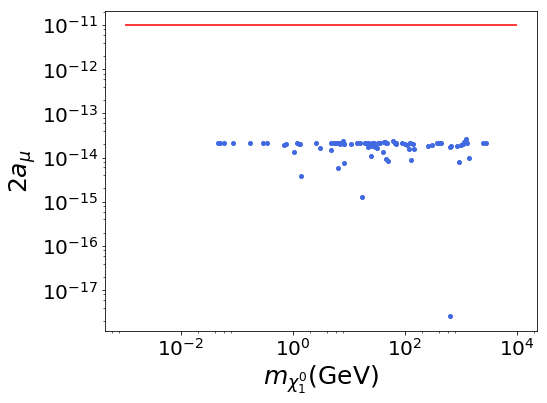

In [56]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.g2mu, color='royalblue', marker='o',ms=4,linestyle='',label='')

plt.hlines(1e-11,1e-3,1e4,'r')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$2 a_{\mu}$',size=25)
#plt.legend(prop={'size':16},loc='lower left')

plt.tight_layout()
plt.show()

# STU parameters

## $\sigma v$ today

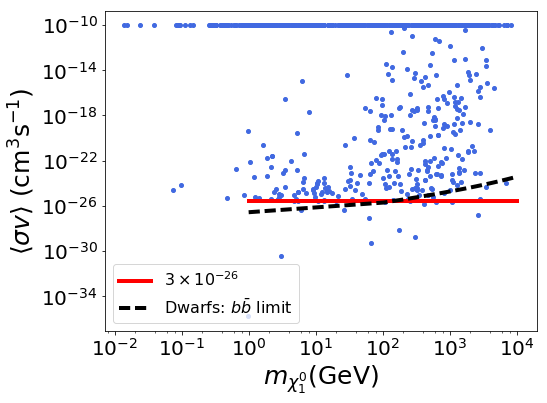

In [139]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.sv, color='royalblue', marker='o',ms=4,linestyle='',label='')

#plt.hlines(3e-26,1,1e4,'r',lw=3,label=r'$3\times 10^{-26}$')
##Plot xx-->> bb --> tt
m=np.linspace(1,10000,100)
plt.plot(m,sigmav_bb_fit(m)*0+3e-26,'r',lw=4,label=r'$3\times 10^{-26}$')
plt.semilogy(m,sigmav_bb_fit(m),'k--',lw=4,label=r'Dwarfs: $b\bar{b}$ limit')
#plt.semilogy(m,sigmav_ww_fit(m),'g-',lw=4,label=r'Dwarfs: $WW$ limit')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=25)
plt.legend(prop={'size':16},loc='lower left')
#plt.xlim(9,2e3)
#plt.ylim(1e-36,1e-24)

plt.tight_layout()
#plt.savefig('plots/sv.pdf')
#plt.show()

# 